## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


# 1) Import Librairies

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, classification_report
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
pio.renderers.default = "iframe_connected"

# 2) Load Data in a DataFrame

In [3]:
df=pd.read_csv('Walmart_Store_sales.csv')

In [4]:
df2=df

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


# 3) EDA

In [6]:
print(f" number of row : {df.shape[0]}")
print(f" number of columns : {df.shape[1]}")

 number of row : 150
 number of columns : 8


In [7]:
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [9]:
print('Percentage of missing values')
100*df.isnull().sum()/df.shape[0]

Percentage of missing values


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Store                  float64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag           float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [11]:
df['Year'] = df['Date'].dt.year

In [12]:
df['Month'] = df['Date'].dt.month

In [13]:
df['Day'] = df['Date'].dt.day

In [14]:
df['Day of Week'] = df['Date'].dt.dayofweek

In [15]:
df['Day of Year'] = df['Date'].dt.dayofyear

In [16]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day of Week,Day of Year
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0,49.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0,84.0
2,17.0,2012-07-27,NaN,0.0,NaN,NaN,130.719581,5.936,2012.0,7.0,27.0,4.0,209.0
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0,148.0


In [17]:
def encode_date(data, col, max_value):
    data[col+'_sin']=np.sin((data[col]*2*np.pi)/max_value)
    data[col+'_cos']=np.cos((data[col]*2*np.pi)/max_value)
    return data

In [18]:
encode_date(df, 'Month', 12)
encode_date(df, 'Day', 31)
encode_date(df, 'Day of Week', 7)
encode_date(df, 'Day of Year', 365)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,...,Day of Week,Day of Year,Month_sin,Month_cos,Day_sin,Day_cos,Day of Week_sin,Day of Week_cos,Day of Year_sin,Day of Year_cos
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,...,4.0,49.0,8.660254e-01,5.000000e-01,-0.485302,-0.874347,-0.433884,-0.900969,0.746972,0.664855
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,...,4.0,84.0,1.000000e+00,6.123234e-17,-0.937752,0.347305,-0.433884,-0.900969,0.992222,0.124479
2,17.0,2012-07-27,NaN,0.0,NaN,NaN,130.719581,5.936,2012.0,7.0,...,4.0,209.0,-5.000000e-01,-8.660254e-01,-0.724793,0.688967,-0.433884,-0.900969,-0.440519,-0.897743
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,...,4.0,148.0,5.000000e-01,-8.660254e-01,-0.571268,0.820763,-0.433884,-0.900969,0.559589,-0.828770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010.0,6.0,...,4.0,169.0,1.224647e-16,-1.000000e+00,-0.485302,-0.874347,-0.433884,-0.900969,0.230306,-0.973118
146,7.0,NaT,716388.81,NaN,20.74,2.778,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,2010.0,11.0,...,5.0,310.0,-5.000000e-01,8.660254e-01,0.937752,0.347305,-0.974928,-0.222521,-0.811539,0.584298
148,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,2011.0,12.0,...,3.0,342.0,-2.449294e-16,1.000000e+00,0.998717,-0.050649,0.433884,-0.900969,-0.385663,0.922640


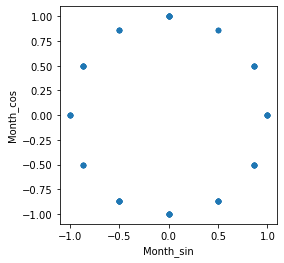

In [19]:
df.plot.scatter('Month_sin', 'Month_cos').set_aspect('equal')

In [20]:
df['Day of Week']=df['Day of Week'].apply(lambda x: 'Monday' if x==0
                                         else 'Tuesday' if x==1
                                         else 'Wednesday' if x==2
                                         else 'Thursday' if x==3
                                         else 'Friday' if x==4
                                         else 'Satursday' if x==5
                                         else 'Sunday' if x==6
                                         else 'Not a Day')

In [21]:
df['Month']=df['Month'].apply(lambda x: 'January' if x==1
                                         else 'February' if x==2
                                         else 'March' if x==3
                                         else 'April' if x==4
                                         else 'May' if x==5
                                         else 'June' if x==6
                                         else 'July' if x==7
                                         else 'August' if x==8
                                         else 'September' if x==9
                                         else 'October' if x==10
                                         else 'November' if x==11
                                         else 'December' if x==12
                                         else 'Not a Month')

In [22]:
#Convert temperature from fahrenheit to celsius
df['Temperature']=(df['Temperature']-32)*5/9

In [23]:
df.sort_values('Store')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,...,Day of Week,Day of Year,Month_sin,Month_cos,Day_sin,Day_cos,Day of Week_sin,Day of Week_cos,Day of Year_sin,Day of Year_cos
74,1.0,2012-10-19,1508068.77,0.0,19.983333,3.594,223.425723,NaN,2012.0,October,...,Friday,293.0,-8.660254e-01,5.000000e-01,-0.651372,-0.758758,-0.433884,-0.900969,-0.945596,0.325342
48,1.0,2011-05-08,1624383.75,NaN,33.138889,3.684,215.544618,7.962,2011.0,May,...,Sunday,128.0,5.000000e-01,-8.660254e-01,0.998717,-0.050649,-0.781831,0.623490,0.806480,-0.591261
44,1.0,2010-12-02,1641957.44,1.0,3.616667,2.548,211.242170,8.106,2010.0,December,...,Thursday,336.0,-2.449294e-16,1.000000e+00,0.394356,0.918958,0.433884,-0.900969,-0.478734,0.877960
95,1.0,2010-05-14,1494251.50,0.0,23.766667,2.854,210.337426,7.808,2010.0,May,...,Friday,134.0,5.000000e-01,-8.660254e-01,0.299363,-0.954139,-0.433884,-0.900969,0.741222,-0.671260
42,1.0,NaT,1661767.33,1.0,NaN,3.730,222.439015,6.908,NaN,Not a Month,...,Not a Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,20.0,NaT,2045837.55,0.0,4.327778,3.739,213.472512,6.961,NaN,Not a Month,...,Not a Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,20.0,2010-09-24,1789687.65,0.0,20.761111,NaN,NaN,7.527,2010.0,September,...,Friday,267.0,-1.000000e+00,-1.836970e-16,-0.988468,0.151428,-0.433884,-0.900969,-0.993257,-0.115935
75,20.0,2010-06-25,1973135.87,0.0,23.983333,2.808,204.567546,7.856,2010.0,June,...,Friday,176.0,1.224647e-16,-1.000000e+00,-0.937752,0.347305,-0.433884,-0.900969,0.111659,-0.993747
71,20.0,2012-07-09,NaN,1.0,24.644444,3.911,215.218957,NaN,2012.0,July,...,Monday,191.0,-5.000000e-01,-8.660254e-01,0.968077,-0.250653,0.000000,1.000000,-0.145799,-0.989314


In [24]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,...,Day of Week,Day of Year,Month_sin,Month_cos,Day_sin,Day_cos,Day of Week_sin,Day of Week_cos,Day of Year_sin,Day of Year_cos
0,6.0,2011-02-18,1572117.54,NaN,15.338889,3.045,214.777523,6.858,2011.0,February,...,Friday,49.0,0.866025,5.000000e-01,-0.485302,-0.874347,-0.433884,-0.900969,0.746972,0.664855
1,13.0,2011-03-25,1807545.43,0.0,5.766667,3.435,128.616064,7.470,2011.0,March,...,Friday,84.0,1.000000,6.123234e-17,-0.937752,0.347305,-0.433884,-0.900969,0.992222,0.124479
2,17.0,2012-07-27,NaN,0.0,NaN,NaN,130.719581,5.936,2012.0,July,...,Friday,209.0,-0.500000,-8.660254e-01,-0.724793,0.688967,-0.433884,-0.900969,-0.440519,-0.897743
3,11.0,NaT,1244390.03,0.0,29.205556,NaN,214.556497,7.346,NaN,Not a Month,...,Not a Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,26.050000,2.759,212.412888,7.092,2010.0,May,...,Friday,148.0,0.500000,-8.660254e-01,-0.571268,0.820763,-0.433884,-0.900969,0.559589,-0.828770


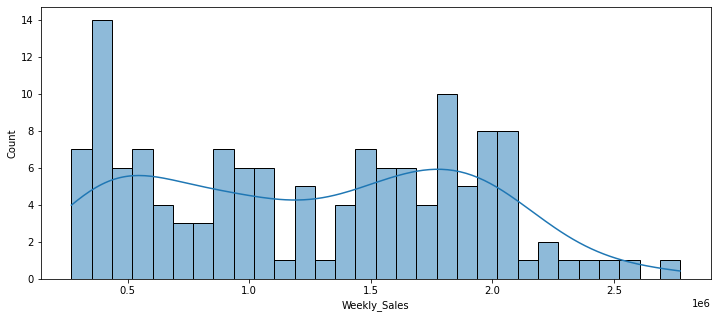

In [25]:
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='Weekly_Sales',kde=True, bins=30)
plt.show()

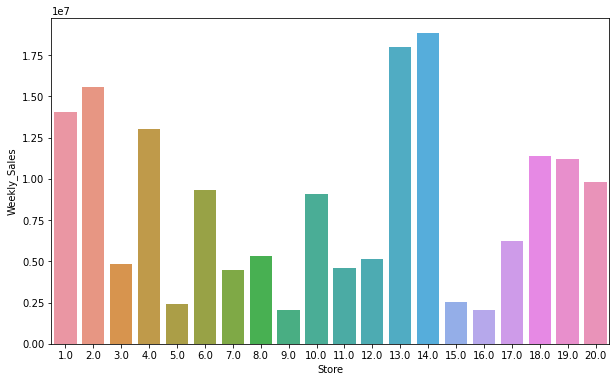

In [26]:
temp =df.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=temp, x='Store', y='Weekly_Sales')
plt.show()

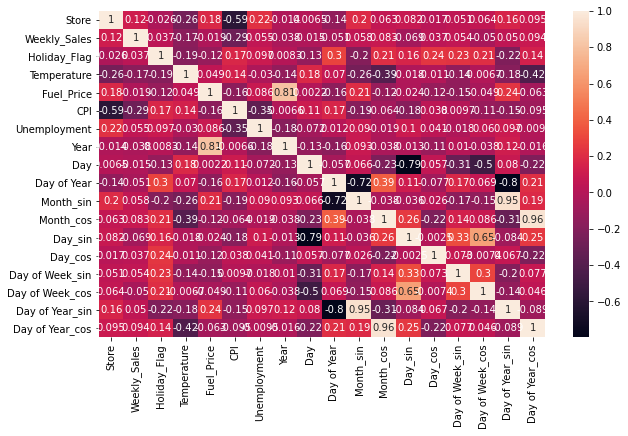

In [27]:
corrMatrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Not a big correlation beetween features except for Fuel_Price and Year explain by the Mideast and North African crisis which led to a rise in oil prices

In [28]:
fig=px.scatter(df, x='Year', y='Fuel_Price')
fig.show()

In [29]:
fig=px.scatter(df, x='Unemployment', y='Weekly_Sales')
fig.show()

#### Few outliers where Unemployment is around 14 <br /> We can see a correlation when Unemployment raises

In [30]:
fig=px.scatter(df, x='CPI', y='Weekly_Sales')
fig.show()

#### Weekly_Sales seems to be higher when CPI is small <br /> If CPI is high it looks like we have cluster with few sales or a lot

In [31]:
fig=px.histogram(df, x='Temperature', y='Weekly_Sales', color_discrete_sequence=['indianred'])
fig.show()

#### Weekly_Sales increase as Temperature raises. There is a peak beetween 0 and 5 degrees, it might correspond to November with Black Friday and end of December 

In [32]:
fig=px.scatter(df, x='Temperature', y='Weekly_Sales', color='Month')
fig.show()

#### We can see December is in fact the highest month of Weekly_Sales, but not November

In [33]:
fig=px.scatter(df, x='Fuel_Price', y='Weekly_Sales')
fig.show()

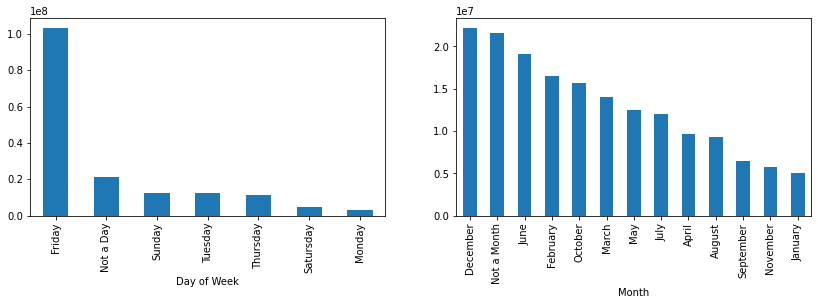

In [34]:
plt.figure(figsize=(14,8))
plt.subplot(221)
df.groupby('Day of Week')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.subplot(222)
df.groupby('Month')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

#### Friday is the day Walmart makes the most of its sales, probably because people go shopping for week end. <br /> As expected December is Walmart's best month <br /> We have a lot of missing values with important number of Sales, unfortunatly we will have to remove thoses to build our model 

# 3) Data Cleaning

In [35]:
#We drop all rows were Weekly_Sales is nan
mask =df['Weekly_Sales'].notna()
df=df[mask]

In [36]:
#In this project, will be considered as outliers all the numeric features that don't fall within the range :
#[mean(X) - 3*sigma(X), mean(X) + 3*sigma(X)]. 
#This concerns the columns : Temperature, Fuel_price, CPI and Unemployment
liste=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for feature in liste:
    to_keep = (df[feature] > df[feature].mean() - 3*df[feature].std()) & (df[feature] < df[feature].mean() + 3*df[feature].std())
    df=df.loc[to_keep,:]

In [37]:
#Dropping all rows with Date missing values
mask=df['Date'].notna()
df=df[mask]

In [38]:
df = df.reset_index(drop=True)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,...,Day of Week,Day of Year,Month_sin,Month_cos,Day_sin,Day_cos,Day of Week_sin,Day of Week_cos,Day of Year_sin,Day of Year_cos
0,6.0,2011-02-18,1572117.54,NaN,15.338889,3.045,214.777523,6.858,2011.0,February,...,Friday,49.0,8.660254e-01,5.000000e-01,-0.485302,-0.874347,-0.433884,-0.900969,0.746972,0.664855
1,13.0,2011-03-25,1807545.43,0.0,5.766667,3.435,128.616064,7.470,2011.0,March,...,Friday,84.0,1.000000e+00,6.123234e-17,-0.937752,0.347305,-0.433884,-0.900969,0.992222,0.124479
2,6.0,2010-05-28,1644470.66,0.0,26.050000,2.759,212.412888,7.092,2010.0,May,...,Friday,148.0,5.000000e-01,-8.660254e-01,-0.571268,0.820763,-0.433884,-0.900969,0.559589,-0.828770
3,15.0,2011-03-06,695396.19,0.0,21.000000,4.069,134.855161,7.658,2011.0,March,...,Sunday,65.0,1.000000e+00,6.123234e-17,0.937752,0.347305,-0.781831,0.623490,0.899631,0.436651
4,20.0,2012-03-02,2203523.20,0.0,4.405556,3.617,213.023623,6.961,2012.0,March,...,Friday,62.0,1.000000e+00,6.123234e-17,0.394356,0.918958,-0.433884,-0.900969,0.875892,0.482508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,7.0,2012-05-25,532739.77,0.0,10.333333,3.804,197.588605,8.090,2012.0,May,...,Friday,146.0,5.000000e-01,-8.660254e-01,-0.937752,0.347305,-0.433884,-0.900969,0.587785,-0.809017
76,3.0,2010-04-06,396968.80,0.0,25.850000,2.705,214.495838,7.343,2010.0,April,...,Tuesday,96.0,8.660254e-01,-5.000000e-01,0.937752,0.347305,0.781831,0.623490,0.996659,-0.081676
77,3.0,2012-10-19,424513.08,0.0,23.022222,3.594,226.968844,6.034,2012.0,October,...,Friday,293.0,-8.660254e-01,5.000000e-01,-0.651372,-0.758758,-0.433884,-0.900969,-0.945596,0.325342
78,14.0,2010-06-18,2248645.59,0.0,22.566667,2.780,182.442420,8.899,2010.0,June,...,Friday,169.0,1.224647e-16,-1.000000e+00,-0.485302,-0.874347,-0.433884,-0.900969,0.230306,-0.973118


In [39]:
df['Holiday_Flag'].isna().sum()

9

#### To avoid dropping more raws, we used https://www.timeanddate.com/holidays/us/2011?hol=313 to get officials flag days as we only have 9 missing values. <br /> We also turn to 1 the 2011-11-11 as it is Veterans Day we found using holidays library

In [40]:
df.loc[10,'Holiday_Flag']=0
df.loc[64,'Holiday_Flag']=0
df.loc[45,'Holiday_Flag']=0
df.loc[52,'Holiday_Flag']=0
df.loc[0,'Holiday_Flag']=0
df.loc[34,'Holiday_Flag']=0
df.loc[30,'Holiday_Flag']=1
df.loc[73,'Holiday_Flag']=1
df.loc[25,'Holiday_Flag']=0
df.loc[23,'Holiday_Flag']=1

In [41]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,...,Day of Week,Day of Year,Month_sin,Month_cos,Day_sin,Day_cos,Day of Week_sin,Day of Week_cos,Day of Year_sin,Day of Year_cos
0,6.0,2011-02-18,1572117.54,0.0,15.338889,3.045,214.777523,6.858,2011.0,February,...,Friday,49.0,8.660254e-01,5.000000e-01,-0.485302,-0.874347,-0.433884,-0.900969,0.746972,0.664855
1,13.0,2011-03-25,1807545.43,0.0,5.766667,3.435,128.616064,7.470,2011.0,March,...,Friday,84.0,1.000000e+00,6.123234e-17,-0.937752,0.347305,-0.433884,-0.900969,0.992222,0.124479
2,6.0,2010-05-28,1644470.66,0.0,26.050000,2.759,212.412888,7.092,2010.0,May,...,Friday,148.0,5.000000e-01,-8.660254e-01,-0.571268,0.820763,-0.433884,-0.900969,0.559589,-0.828770
3,15.0,2011-03-06,695396.19,0.0,21.000000,4.069,134.855161,7.658,2011.0,March,...,Sunday,65.0,1.000000e+00,6.123234e-17,0.937752,0.347305,-0.781831,0.623490,0.899631,0.436651
4,20.0,2012-03-02,2203523.20,0.0,4.405556,3.617,213.023623,6.961,2012.0,March,...,Friday,62.0,1.000000e+00,6.123234e-17,0.394356,0.918958,-0.433884,-0.900969,0.875892,0.482508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,7.0,2012-05-25,532739.77,0.0,10.333333,3.804,197.588605,8.090,2012.0,May,...,Friday,146.0,5.000000e-01,-8.660254e-01,-0.937752,0.347305,-0.433884,-0.900969,0.587785,-0.809017
76,3.0,2010-04-06,396968.80,0.0,25.850000,2.705,214.495838,7.343,2010.0,April,...,Tuesday,96.0,8.660254e-01,-5.000000e-01,0.937752,0.347305,0.781831,0.623490,0.996659,-0.081676
77,3.0,2012-10-19,424513.08,0.0,23.022222,3.594,226.968844,6.034,2012.0,October,...,Friday,293.0,-8.660254e-01,5.000000e-01,-0.651372,-0.758758,-0.433884,-0.900969,-0.945596,0.325342
78,14.0,2010-06-18,2248645.59,0.0,22.566667,2.780,182.442420,8.899,2010.0,June,...,Friday,169.0,1.224647e-16,-1.000000e+00,-0.485302,-0.874347,-0.433884,-0.900969,0.230306,-0.973118


In [42]:
df['Holiday_Flag']=df['Holiday_Flag'].apply(lambda x: 'Yes' if x==1
                                           else 'No')

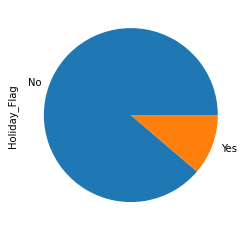

In [43]:
df['Holiday_Flag'].value_counts().plot(kind='pie')
plt.show()

# 3) Data Preprocessing

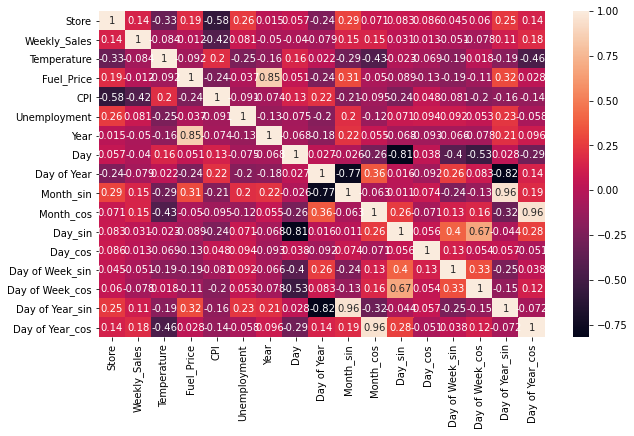

In [44]:
corrMatrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [45]:
df=df.drop(['Date', 'Month', 'Day', 'Day of Week', 'Day of Year'], axis=1)

In [46]:
df['Store']=df['Store'].astype(str)

In [47]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month_sin,Month_cos,Day_sin,Day_cos,Day of Week_sin,Day of Week_cos,Day of Year_sin,Day of Year_cos
0,6.0,1572117.54,No,15.338889,3.045,214.777523,6.858,2011.0,0.866025,5.000000e-01,-0.485302,-0.874347,-0.433884,-0.900969,0.746972,0.664855
1,13.0,1807545.43,No,5.766667,3.435,128.616064,7.470,2011.0,1.000000,6.123234e-17,-0.937752,0.347305,-0.433884,-0.900969,0.992222,0.124479
2,6.0,1644470.66,No,26.050000,2.759,212.412888,7.092,2010.0,0.500000,-8.660254e-01,-0.571268,0.820763,-0.433884,-0.900969,0.559589,-0.828770
3,15.0,695396.19,No,21.000000,4.069,134.855161,7.658,2011.0,1.000000,6.123234e-17,0.937752,0.347305,-0.781831,0.623490,0.899631,0.436651
4,20.0,2203523.20,No,4.405556,3.617,213.023623,6.961,2012.0,1.000000,6.123234e-17,0.394356,0.918958,-0.433884,-0.900969,0.875892,0.482508


In [48]:
Y=df['Weekly_Sales']
X=df.drop(['Weekly_Sales'], axis=1)
print(X.head())
print()
print(Y.head())

  Store Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0   6.0           No    15.338889       3.045  214.777523         6.858   
1  13.0           No     5.766667       3.435  128.616064         7.470   
2   6.0           No    26.050000       2.759  212.412888         7.092   
3  15.0           No    21.000000       4.069  134.855161         7.658   
4  20.0           No     4.405556       3.617  213.023623         6.961   

     Year  Month_sin     Month_cos   Day_sin   Day_cos  Day of Week_sin  \
0  2011.0   0.866025  5.000000e-01 -0.485302 -0.874347        -0.433884   
1  2011.0   1.000000  6.123234e-17 -0.937752  0.347305        -0.433884   
2  2010.0   0.500000 -8.660254e-01 -0.571268  0.820763        -0.433884   
3  2011.0   1.000000  6.123234e-17  0.937752  0.347305        -0.781831   
4  2012.0   1.000000  6.123234e-17  0.394356  0.918958        -0.433884   

   Day of Week_cos  Day of Year_sin  Day of Year_cos  
0        -0.900969         0.746972        

In [49]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Day of Week_sin', 'Day of Week_cos', 'Day of Year_sin', 'Day of Year_cos']  at positions  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Found categorical features  ['Store', 'Holiday_Flag']  at positions  [0, 1]


In [50]:
# Split data into train and test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [51]:
X_train=X_train.values
X_test=X_test.values
Y_train=Y_train.to_list()
Y_test=Y_test.to_list()

In [52]:
X.describe()

,Temperature,Fuel_Price,CPI,Unemployment,Year,Month_sin,Month_cos,Day_sin,Day_cos,Day of Week_sin,Day of Week_cos,Day of Year_sin,Day of Year_cos
count,80.000000,80.000000,80.000000,80.000000,80.000000,8.000000e+01,8.000000e+01,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,16.182083,3.290700,181.077638,7.301775,2010.887500,8.705127e-02,-7.577722e-02,-0.026599,-0.057099,-0.277940,-0.530660,0.080286,-0.051991
std,9.693111,0.491223,38.847021,0.955392,0.826672,7.083924e-01,7.052302e-01,0.723360,0.696700,0.433000,0.679541,0.727046,0.689055
min,-7.338889,2.548000,126.139200,5.143000,2010.000000,-1.000000e+00,-1.000000e+00,-0.998717,-0.994869,-0.974928,-0.900969,-0.999250,-0.999963
25%,7.548611,2.804000,132.610242,6.520750,2010.000000,-5.000000e-01,-8.660254e-01,-0.724793,-0.758758,-0.433884,-0.900969,-0.606248,-0.671260
50%,16.361111,3.390500,197.500965,7.345500,2011.000000,1.224647e-16,-1.836970e-16,-0.101168,-0.050649,-0.433884,-0.900969,0.137274,-0.081676
75%,24.154167,3.689750,214.809008,8.090000,2012.000000,8.660254e-01,5.000000e-01,0.741289,0.528964,-0.433884,-0.900969,0.807745,0.655138
max,33.138889,4.170000,226.968844,9.342000,2012.000000,1.000000e+00,1.000000e+00,0.998717,1.000000,0.781831,1.000000,0.999769,1.000000


In [53]:
X.dtypes

Store               object
Holiday_Flag        object
Temperature        float64
Fuel_Price         float64
CPI                float64
Unemployment       float64
Year               float64
Month_sin          float64
Month_cos          float64
Day_sin            float64
Day_cos            float64
Day of Week_sin    float64
Day of Week_cos    float64
Day of Year_sin    float64
Day of Year_cos    float64
dtype: object

In [54]:
numeric_transformer= StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

In [55]:
X_train=featureencoder.fit_transform(X_train)
X_test=featureencoder.transform(X_test)

# 4) Linear Regression

In [56]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [57]:
Y_train_pred=regressor.predict(X_train)

In [58]:
Y_test_pred=regressor.predict(X_test)

In [59]:
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9914840220846004
R2 score on test set :  0.9600239044428921


In [60]:
print('regression MSE on training set:',mean_squared_error(Y_train, Y_train_pred))

print('regression MSE on test set:',mean_squared_error(Y_test, Y_test_pred))

regression MSE on training set: 3688186954.586683
regression MSE on test set: 20228934338.26813


In [61]:
regressor.coef_

array([ 3294674.94228628,   355586.47149701,  3286755.02250371,
        1538016.36240726,  1650047.5159178 ,  -379900.87212228,
        1967146.3129812 ,  2062400.180815  ,  2486018.41228399,
         279109.42181596,   682128.72704698, -1320345.89563109,
        3415333.4661329 , -1305731.60179428,    59577.5843552 ,
        -358517.79437436,  -771659.35471114, -1163065.36708724,
         -77667.31976701,   -71976.09732652,   -31718.19916733,
        1300483.74108169,    -9990.23121178,   -74167.05840944,
         294555.12172695,  -233024.23914194,    27565.0553191 ,
         -35610.22951231,     3820.20288151,    44567.37590525,
        -348598.06941978,   115953.89550729])

In [62]:
# Access transformers from feature_encoder
print("All transformers are: ", featureencoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", featureencoder.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(drop='first'), [0, 1]), ('num', StandardScaler(), [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])]
One Hot Encoder transformer is:  OneHotEncoder(drop='first')


In [63]:
categorical_column_names = np.concatenate(featureencoder.transformers_[0][1].categories_)
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  ['1.0' '10.0' '11.0' '13.0' '14.0' '15.0' '16.0' '17.0' '18.0' '19.0'
 '2.0' '20.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0' 'No' 'Yes']


In [64]:
np.delete(categorical_column_names, [0])

array(['10.0', '11.0', '13.0', '14.0', '15.0', '16.0', '17.0', '18.0',
       '19.0', '2.0', '20.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0', 'No', 'Yes'], dtype=object)

In [65]:
categorical_column_names

array(['1.0', '10.0', '11.0', '13.0', '14.0', '15.0', '16.0', '17.0',
       '18.0', '19.0', '2.0', '20.0', '3.0', '4.0', '5.0', '6.0', '7.0',
       '8.0', '9.0', 'No', 'Yes'], dtype=object)

In [66]:
#drop each first categorical feature as OneHotEncoder
categorical_column_names=np.delete(categorical_column_names, [0, 19])

In [67]:
(df['Store']=='12.0').any()

False

In [68]:
numerical_column_names = X.loc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

numerical columns are:  Index(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month_sin',
       'Month_cos', 'Day_sin', 'Day_cos', 'Day of Week_sin', 'Day of Week_cos',
       'Day of Year_sin', 'Day of Year_cos'],
      dtype='object')


In [69]:
all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names

array(['10.0', '11.0', '13.0', '14.0', '15.0', '16.0', '17.0', '18.0',
       '19.0', '2.0', '20.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0', 'Yes', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos',
       'Day of Week_sin', 'Day of Week_cos', 'Day of Year_sin',
       'Day of Year_cos'], dtype=object)

In [70]:
len(regressor.coef_)

32

In [71]:
len(all_column_names)

32

In [72]:
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

feature_importance['coefficients']=feature_importance['coefficients'].abs()
feature_importance.sort_values('coefficients', ascending=False)

,feature_names,coefficients
12,4.0,3.415333e+06
0,10.0,3.294675e+06
2,13.0,3.286755e+06
8,19.0,2.486018e+06
7,18.0,2.062400e+06
6,17.0,1.967146e+06
4,15.0,1.650048e+06
3,14.0,1.538016e+06
11,3.0,1.320346e+06
13,5.0,1.305732e+06


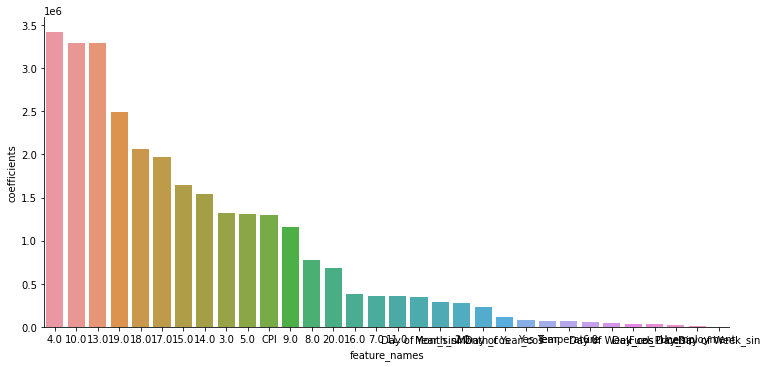

In [73]:
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values("coefficients", ascending=False), 
            kind="bar",
            aspect=19/9)


# 5) Ridge

In [74]:
model = Ridge()

In [75]:
scores = cross_val_score(model, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.629208336091544
The standard deviation is :  0.25130091065867133


In [116]:
# Grid of values to be tested
params = {
    'alpha': np.arange(0.0, 0.0002, 0.000001) # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(model, param_grid = params, cv = 10) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Best hyperparameters :  {'alpha': 0.000185}
Best R2 score :  0.9237954984938727


In [124]:
gridsearch.score(X_test, Y_test)

0.9587055376586557

In [120]:
Y_train_pred = gridsearch.predict(X_train)

In [121]:
Y_test_pred = gridsearch.predict(X_test)

In [122]:
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9914132916329883
R2 score on test set :  0.9587055376586557


# 6) Lasso

In [100]:
lasso1 = Lasso(alpha = 1)
lasso001 = Lasso(alpha = 0.01)
lasso00001 = Lasso(alpha = 0.0001)

In [101]:
lasso1.fit(X_train, Y_train)
lasso001.fit(X_train, Y_train)
lasso00001.fit(X_train, Y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 107268295242.62372, tolerance: 2425305367.2598996

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 109686977041.5592, tolerance: 2425305367.2598996

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 109709626939.82886, tolerance: 2425305367.2598996



Lasso(alpha=0.0001)

In [102]:
print(lasso1.score(X_train, Y_train))
print(lasso001.score(X_train, Y_train))
print(lasso00001.score(X_train, Y_train))

0.9909453753301394
0.9909528284071825
0.990952902987468


In [103]:
print(lasso1.score(X_test, Y_test))
print(lasso001.score(X_test, Y_test))
print(lasso00001.score(X_test, Y_test))

0.9545637708221149
0.9546171635767003
0.9546176989085543


In [104]:
regressor2=Lasso()
param={'alpha' : [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]}
gridsearch=GridSearchCV(regressor2, param_grid=param, cv=10, verbose=1)
gridsearch.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 91115630372.0112, tolerance: 2191677127.7610054

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 79280682789.93674, tolerance: 2005870604.117232

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 81168724397.5095, tolerance: 2074480656.5735326

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08, 1e-09]},
             verbose=1)

In [105]:
print("Best hyperparameters : ", gridsearch.best_params_)

Best hyperparameters :  {'alpha': 1e-09}


In [106]:
gridsearch.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 91115630372.0112, tolerance: 2191677127.7610054

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 79280682789.93674, tolerance: 2005870604.117232

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 81168724397.5095, tolerance: 2074480656.5735326

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08, 1e-09]},
             verbose=1)

In [110]:

Y_train_pred_best=gridsearch.predict(X_train)
Y_test_pred_best=gridsearch.predict(X_test)

print('lasso best train score :',r2_score(Y_train, Y_train_pred_best))

print('lasso best test score :',r2_score(Y_test, Y_test_pred_best))

print('lasso best train MSE:',mean_squared_error(Y_train, Y_train_pred_best))

print('lasso best test MSE:',mean_squared_error(Y_test, Y_test_pred_best))

display(pd.DataFrame({'gene' : all_column_names, 'coef' : gridsearch.best_estimator_.coef_}).sort_values('coef', ascending=False))

lasso best train score : 0.9909529037407652
lasso best test score : 0.9546177043157543
lasso best train MSE: 3918209127.792701
lasso best test MSE: 22964610893.65302


,gene,coef
12,4.0,1.696385e+06
2,13.0,1.533808e+06
0,10.0,1.486724e+06
3,14.0,8.916247e+05
8,19.0,8.425274e+05
10,20.0,5.564478e+05
21,CPI,5.029294e+05
1,11.0,4.289789e+05
7,18.0,3.743211e+05
24,Month_sin,3.320076e+05


In [459]:
!pip install holidays

  Using cached holidays-0.11.3.1-py3-none-any.whl (155 kB)
  Using cached hijri_converter-2.2.2-py3-none-any.whl (13 kB)
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
  Using cached convertdate-2.3.2-py3-none-any.whl (47 kB)
Processing /home/jovyan/.cache/pip/wheels/a0/8b/b2/810ae5a6f970c8be4725353400d643c90de1c0f023a9884ee7/PyMeeus-0.5.11-py3-none-any.whl


In [460]:
import holidays

In [461]:
liste=[]
for date, name in sorted(holidays.US(years=[2010,2011,2012]).items()):
    liste.append(date)

In [462]:
liste

[datetime.date(2010, 1, 1),
 datetime.date(2010, 1, 18),
 datetime.date(2010, 2, 15),
 datetime.date(2010, 5, 31),
 datetime.date(2010, 7, 4),
 datetime.date(2010, 7, 5),
 datetime.date(2010, 9, 6),
 datetime.date(2010, 10, 11),
 datetime.date(2010, 11, 11),
 datetime.date(2010, 11, 25),
 datetime.date(2010, 12, 24),
 datetime.date(2010, 12, 25),
 datetime.date(2010, 12, 31),
 datetime.date(2011, 1, 1),
 datetime.date(2011, 1, 17),
 datetime.date(2011, 2, 21),
 datetime.date(2011, 5, 30),
 datetime.date(2011, 7, 4),
 datetime.date(2011, 9, 5),
 datetime.date(2011, 10, 10),
 datetime.date(2011, 11, 11),
 datetime.date(2011, 11, 24),
 datetime.date(2011, 12, 25),
 datetime.date(2011, 12, 26),
 datetime.date(2012, 1, 1),
 datetime.date(2012, 1, 2),
 datetime.date(2012, 1, 16),
 datetime.date(2012, 2, 20),
 datetime.date(2012, 5, 28),
 datetime.date(2012, 7, 4),
 datetime.date(2012, 9, 3),
 datetime.date(2012, 10, 8),
 datetime.date(2012, 11, 11),
 datetime.date(2012, 11, 12),
 datetime.da

In [475]:
temp=df[df['Holiday_Flag'].isna()].sort_values('Date')
temp

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day of Week,Month_sin,Month_cos,Day_sin,Day_cos,Day of Week_sin,Day of Week_cos,holidays
10,6.0,2010-04-30,1498080.16,NaN,20.505556,2.780,211.894272,7.092,2010.0,April,30.0,Friday,8.660254e-01,-5.000000e-01,-0.201299,0.979530,-0.433884,-0.900969,0
64,9.0,2010-06-18,513073.87,NaN,28.327778,2.637,215.016648,6.384,2010.0,June,18.0,Friday,1.224647e-16,-1.000000e+00,-0.485302,-0.874347,-0.433884,-0.900969,0
45,1.0,2010-08-27,1449142.92,NaN,29.566667,2.619,211.567306,7.787,2010.0,August,27.0,Friday,-8.660254e-01,-5.000000e-01,-0.724793,0.688967,-0.433884,-0.900969,0
52,9.0,2010-09-07,485389.15,NaN,25.838889,2.642,214.656430,6.442,2010.0,September,7.0,Tuesday,-1.000000e+00,-1.836970e-16,0.988468,0.151428,0.781831,0.623490,0
0,6.0,2011-02-18,1572117.54,NaN,15.338889,3.045,214.777523,6.858,2011.0,February,18.0,Friday,8.660254e-01,5.000000e-01,-0.485302,-0.874347,-0.433884,-0.900969,0
34,14.0,2011-03-25,1879451.23,NaN,5.422222,3.625,184.994368,8.549,2011.0,March,25.0,Friday,1.000000e+00,6.123234e-17,-0.937752,0.347305,-0.433884,-0.900969,0
30,1.0,2011-05-08,1624383.75,NaN,33.138889,3.684,215.544618,7.962,2011.0,May,8.0,Sunday,5.000000e-01,-8.660254e-01,0.998717,-0.050649,-0.781831,0.623490,0
73,4.0,2011-08-07,2066541.86,NaN,29.216667,3.469,129.112500,5.644,2011.0,August,7.0,Sunday,-8.660254e-01,-5.000000e-01,0.988468,0.151428,-0.781831,0.623490,0
25,7.0,2011-08-26,629994.47,NaN,14.222222,3.485,194.379637,8.622,2011.0,August,26.0,Friday,-8.660254e-01,-5.000000e-01,-0.848644,0.528964,-0.433884,-0.900969,0


In [478]:
temp['Holidays']=pd.np.where(temp['Date'].isin(liste), 1, 0)

<ipython-input-478-7642b1b63f16>:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [483]:
temp[['Date','Holiday_Flag', 'Holidays']]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day of Week,Month_sin,Month_cos,Day_sin,Day_cos,Day of Week_sin,Day of Week_cos,holidays,Holidays
10,6.0,2010-04-30,1498080.16,NaN,20.505556,2.780,211.894272,7.092,2010.0,April,30.0,Friday,8.660254e-01,-5.000000e-01,-0.201299,0.979530,-0.433884,-0.900969,0,0
64,9.0,2010-06-18,513073.87,NaN,28.327778,2.637,215.016648,6.384,2010.0,June,18.0,Friday,1.224647e-16,-1.000000e+00,-0.485302,-0.874347,-0.433884,-0.900969,0,0
45,1.0,2010-08-27,1449142.92,NaN,29.566667,2.619,211.567306,7.787,2010.0,August,27.0,Friday,-8.660254e-01,-5.000000e-01,-0.724793,0.688967,-0.433884,-0.900969,0,0
52,9.0,2010-09-07,485389.15,NaN,25.838889,2.642,214.656430,6.442,2010.0,September,7.0,Tuesday,-1.000000e+00,-1.836970e-16,0.988468,0.151428,0.781831,0.623490,0,0
0,6.0,2011-02-18,1572117.54,NaN,15.338889,3.045,214.777523,6.858,2011.0,February,18.0,Friday,8.660254e-01,5.000000e-01,-0.485302,-0.874347,-0.433884,-0.900969,0,0
34,14.0,2011-03-25,1879451.23,NaN,5.422222,3.625,184.994368,8.549,2011.0,March,25.0,Friday,1.000000e+00,6.123234e-17,-0.937752,0.347305,-0.433884,-0.900969,0,0
30,1.0,2011-05-08,1624383.75,NaN,33.138889,3.684,215.544618,7.962,2011.0,May,8.0,Sunday,5.000000e-01,-8.660254e-01,0.998717,-0.050649,-0.781831,0.623490,0,0
73,4.0,2011-08-07,2066541.86,NaN,29.216667,3.469,129.112500,5.644,2011.0,August,7.0,Sunday,-8.660254e-01,-5.000000e-01,0.988468,0.151428,-0.781831,0.623490,0,0
25,7.0,2011-08-26,629994.47,NaN,14.222222,3.485,194.379637,8.622,2011.0,August,26.0,Friday,-8.660254e-01,-5.000000e-01,-0.848644,0.528964,-0.433884,-0.900969,0,0


In [486]:
df2['holidays'] = pd.np.where(df2['Date'].isin(liste), 1, 0)

<ipython-input-486-5774d0737d75>:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [502]:
df2[df2['holidays']==1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day of Week,Month_sin,Month_cos,Day_sin,Day_cos,Day of Week_sin,Day of Week_cos,holidays
23,5.0,2011-11-11,311906.70,0.0,15.95,3.297,218.569962,6.300,2011.0,November,11.0,Friday,-5.000000e-01,0.866025,7.907757e-01,-0.612106,-0.433884,-0.900969,1
61,20.0,2010-12-31,1799737.79,1.0,-1.75,3.179,204.643227,7.484,2010.0,December,31.0,Friday,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-0.433884,-0.900969,1


In [472]:
df2['holidays'].value_counts()

0    78
1     2
Name: holidays, dtype: int64

In [473]:
len(df2['Holiday_Flag'])

80

In [474]:
df2['Holiday_Flag'].isna().sum()

9

In [369]:
df2[df2['Holiday_Flag'].isna()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day of Week,holidays
0,6.0,2011-02-18,1572117.54,NaN,15.338889,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0,0
15,6.0,2010-04-30,1498080.16,NaN,20.505556,2.780,211.894272,7.092,2010.0,4.0,30.0,4.0,0
43,7.0,2011-08-26,629994.47,NaN,14.222222,3.485,194.379637,8.622,2011.0,8.0,26.0,4.0,0
48,1.0,2011-05-08,1624383.75,NaN,33.138889,3.684,215.544618,7.962,2011.0,5.0,8.0,6.0,0
53,14.0,2011-03-25,1879451.23,NaN,5.422222,3.625,184.994368,8.549,2011.0,3.0,25.0,4.0,0
65,10.0,NaT,1714309.90,NaN,6.350000,3.287,127.191774,8.744,NaN,NaN,NaN,NaN,0
73,1.0,2010-08-27,1449142.92,NaN,29.566667,2.619,211.567306,7.787,2010.0,8.0,27.0,4.0,0
90,9.0,2010-09-07,485389.15,NaN,25.838889,2.642,214.656430,6.442,2010.0,9.0,7.0,1.0,0
109,1.0,2011-09-12,NaN,NaN,6.627778,3.158,218.961846,7.866,2011.0,9.0,12.0,0.0,0
118,9.0,2010-06-18,513073.87,NaN,28.327778,2.637,215.016648,6.384,2010.0,6.0,18.0,4.0,0


In [363]:
(df['Holiday_Flag']!=df2['holidays']).sum()

23

In [181]:
df2['Date'].min()

Timestamp('2010-01-10 00:00:00')

In [182]:
df2['Date'].max()

Timestamp('2012-12-10 00:00:00')